<a href="https://colab.research.google.com/github/samuelrar/Alguns-projetos-de-data-dcience/blob/main/Quando_a_expectativa_de_vida_no_LATAM_supera_a_da_Europa%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando Bibliotecas

In [15]:
from vega_datasets import data
import altair as alt
import pandas as pd
import numpy as np

#bibliotecas de regressão

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt


## Lendo os dados

In [2]:
gm = data.gapminder()
gm.head()

,year,country,cluster,pop,life_expect,fertility
0,1955,Afghanistan,0,8891209,30.332,7.7
1,1960,Afghanistan,0,9829450,31.997,7.7
2,1965,Afghanistan,0,10997885,34.020,7.7
3,1970,Afghanistan,0,12430623,36.088,7.7
4,1975,Afghanistan,0,14132019,38.438,7.7


In [3]:
for i in range(0,6):
  lista = gm[gm.cluster == i]['country'].unique()
  print(lista)

['Afghanistan' 'Bangladesh' 'India' 'Pakistan']
['Austria' 'Belgium' 'Croatia' 'Finland' 'France' 'Georgia' 'Germany'
 'Greece' 'Iceland' 'Ireland' 'Italy' 'Netherlands' 'Norway' 'Poland'
 'Portugal' 'Spain' 'Switzerland' 'Turkey' 'United Kingdom']
['Kenya' 'Nigeria' 'Rwanda' 'South Africa']
['Argentina' 'Aruba' 'Bahamas' 'Barbados' 'Bolivia' 'Brazil' 'Canada'
 'Chile' 'Colombia' 'Costa Rica' 'Cuba' 'Dominican Republic' 'Ecuador'
 'El Salvador' 'Grenada' 'Haiti' 'Jamaica' 'Mexico' 'Peru' 'United States'
 'Venezuela']
['Australia' 'China' 'Hong Kong' 'Indonesia' 'Japan' 'South Korea'
 'North Korea' 'New Zealand' 'Philippines']
['Egypt' 'Iran' 'Iraq' 'Israel' 'Lebanon' 'Saudi Arabia']


In [4]:
gm['Região'] = gm.cluster

In [5]:
#Agrupando os países por regiões
def continente(linha):
  if linha['Região'] == 0 or linha['Região'] == 5:
    return 'Oriente Médio'
  if linha['Região'] == 1:
    return 'Europa'
  if linha['Região'] == 2:
    return 'África'
  if linha['Região'] == 3:
    return 'América Latina'
  if linha['Região'] == 4:
    return 'Ásia'
gm['Região'] = gm.apply(lambda linha: continente(linha), axis = 1)
gm

,year,country,cluster,pop,life_expect,fertility,Região
0,1955,Afghanistan,0,8891209,30.332,7.7000,Oriente Médio
1,1960,Afghanistan,0,9829450,31.997,7.7000,Oriente Médio
2,1965,Afghanistan,0,10997885,34.020,7.7000,Oriente Médio
3,1970,Afghanistan,0,12430623,36.088,7.7000,Oriente Médio
4,1975,Afghanistan,0,14132019,38.438,7.7000,Oriente Médio
...,...,...,...,...,...,...,...
688,1985,Venezuela,3,16997509,70.190,3.6485,América Latina
689,1990,Venezuela,3,19325222,71.150,3.2500,América Latina
690,1995,Venezuela,3,21555902,72.146,2.9415,América Latina
691,2000,Venezuela,3,23542649,72.766,2.7230,América Latina


## Visualizando os dados utilizando o Vega Altair -> Abrir no COLAB ou VS CODE

In [7]:
gm2005 = gm[gm.year == 2005]

In [8]:
selecao = alt.selection_single(fields=['Região'], empty = 'none')

linhas = alt.Chart(gm).mark_line().encode(
    x = 'year:T',
    y = alt.Y('average(life_expect):Q', scale = alt.Scale(zero = False)),
    color= 'Região:N'
)

pontos = alt.Chart(gm).mark_circle().encode(
    x = 'year:T',
    y = alt.Y('average(life_expect):Q', scale = alt.Scale(zero = False)),
    color='Região:N'
)

final_linhas = (linhas + pontos).add_selection(selecao).encode(
    tooltip = ['year','average(life_expect)','Região'],
    x = alt.X(axis = alt.Axis(title = 'Ano')),
    y = alt.Y(axis = alt.Axis(title = 'Expectativa de vida média'))
)

barras = alt.Chart(gm).mark_bar().encode(
    y = alt.Y('country', axis = alt.Axis(title = 'País')),
    x = alt.X('life_expect', axis = alt.Axis(title = 'Expectativa de vida em 2005')),
    tooltip = ['country', 'life_expect', 'year']
).transform_filter(
    selecao
).properties(
    height = 300)

texto_barras = alt.Chart(gm2005).mark_text(
    dx = 30,
    color = 'red'
).encode(
    y = 'country:N',
    x = 'life_expect:Q',
    text = 'life_expect:Q'
).transform_filter(
    selecao
).properties(
    height = 300)

final_barras = (barras + texto_barras).transform_filter(
    selecao
).properties(
    height = 300)

final_total = alt.hconcat(final_linhas, final_barras)

final_total

alt.HConcatChart(...)

## Aplicando regressão linear para projetar quando a expectativa de vida na América Latina supera a da Europa

In [9]:
data = pd.DataFrame(gm.groupby(['Região','year'])['life_expect'].mean().reset_index())
data = data[data['Região'].isin(['América Latina', 'Europa'])]
data_eu = data[data['Região'] == 'Europa']
data_latam = data[data['Região'] == 'América Latina']

In [10]:
#Abrir no COLAB ou VS CODE
grafico  = (

alt.Chart(data).mark_line().encode(
    x = 'year',
    y = alt.Y('life_expect', scale = alt.Scale(zero = False)),
    color = 'Região'
)

+

alt.Chart(data).mark_point().encode(
    x = 'year',
    y = alt.Y('life_expect', scale = alt.Scale(zero = False)),
    color = 'Região'
)

).encode(
    tooltip = ['year', 'life_expect']
)

grafico

alt.LayerChart(...)

In [11]:
print('Correlação entre expectativa de vida e o tempo para Latam\n', data_latam.drop('Região', axis = 1).corr(),'\n')

print('Correlação entre expectativa de vida e o tempo para Europa\n', data_eu.drop('Região', axis = 1).corr())

Correlação entre expectativa de vida e o tempo para Latam
                  year  life_expect
year         1.000000     0.994098
life_expect  0.994098     1.000000 

Correlação entre expectativa de vida e o tempo para Europa
                  year  life_expect
year         1.000000     0.998963
life_expect  0.998963     1.000000


### Regressão para região do LATAM

In [13]:
#Regressão LATAM

X = np.array(data_latam['year']).reshape(-1, 1)
y = (data_latam['life_expect'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

modelo_latam = LinearRegression()

modelo_latam.fit(X_train, y_train)
y_pred = modelo_latam.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print("Mean Squared Error (MSE):", mse.round(3))
print("Coeficiente de Determinação (R²):", r2.round(3))
print("Mean Absolute Error (MAE):", mae.round(2))

Mean Squared Error (MSE): 0.227
Coeficiente de Determinação (R²): 0.987
Mean Absolute Error (MAE): 0.46


In [14]:
print('Coeficiente Linear Regressão Latam:', modelo_latam.coef_)

print('Coeficiente Linear Regressão Latam:', round(modelo_latam.intercept_,2))

Coeficiente Linear Regressão Latam: [0.34052845]
Coeficiente Linear Regressão Latam: -607.98


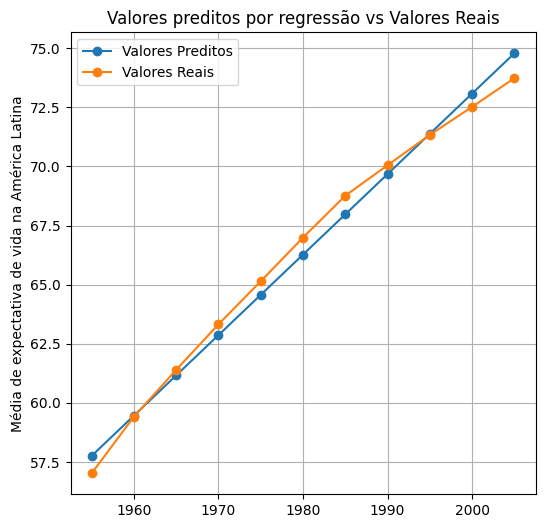

In [16]:
predito = modelo_latam.coef_*X + modelo_latam.intercept_

gr_latam = (
plt.figure(figsize = (6,6)),
plt.plot(X, predito, marker='o', linestyle='-', label='Valores Preditos'),
plt.plot(X, y, marker='o', linestyle='-', label='Valores Reais'),
plt.ylabel('Média de expectativa de vida na América Latina'),
plt.title('Valores preditos por regressão vs Valores Reais'),
plt.legend(),
plt.grid(True)
)

### Regressão para EUROPA

In [17]:
X_eu = np.array(data_eu['year']).reshape(-1, 1)
y_eu = (data_eu['life_expect'])

X_train, X_test, y_train, y_test = train_test_split(X_eu, y_eu, test_size = 0.3, random_state = 1)

modelo_eu = LinearRegression()

modelo_eu.fit(X_train, y_train)
y_pred_eu = modelo_eu.predict(X_test)

mse = mean_squared_error(y_test, y_pred_eu)
r2 = r2_score(y_test, y_pred_eu)
mae = mean_absolute_error(y_test, y_pred_eu)


print("Mean Squared Error (MSE):", mse.round(3))
print("Coeficiente de Determinação (R²):", r2.round(3))
print("Mean Absolute Error (MAE):", mae.round(2))

Mean Squared Error (MSE): 0.03
Coeficiente de Determinação (R²): 0.997
Mean Absolute Error (MAE): 0.14


In [18]:
print('Coeficiente Linear Regressão Latam:', modelo_eu.coef_)

print('Coeficiente Linear Regressão Latam:', round(modelo_eu.intercept_,2))

Coeficiente Linear Regressão Latam: [0.22560479]
Coeficiente Linear Regressão Latam: -373.56


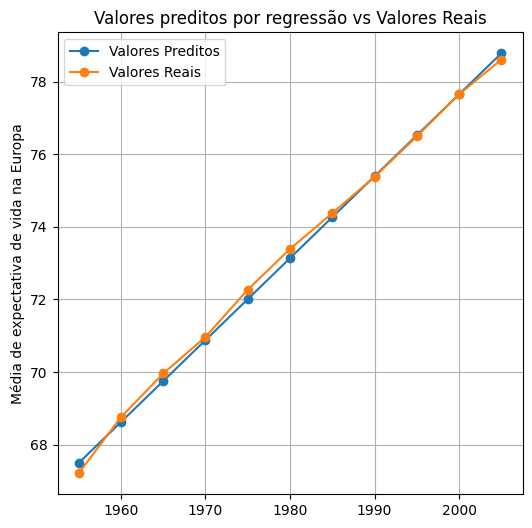

In [19]:
predito_eu = modelo_eu.coef_*X + modelo_eu.intercept_

gr_eu = (
plt.figure(figsize = (6,6)),
plt.plot(X_eu, predito_eu, marker='o', linestyle='-', label='Valores Preditos'),
plt.plot(X_eu, y_eu, marker='o', linestyle='-', label='Valores Reais'),
plt.ylabel('Média de expectativa de vida na Europa'),
plt.title('Valores preditos por regressão vs Valores Reais'),
plt.legend(),
plt.grid(True)
)

### Comparação entre as duas projeções

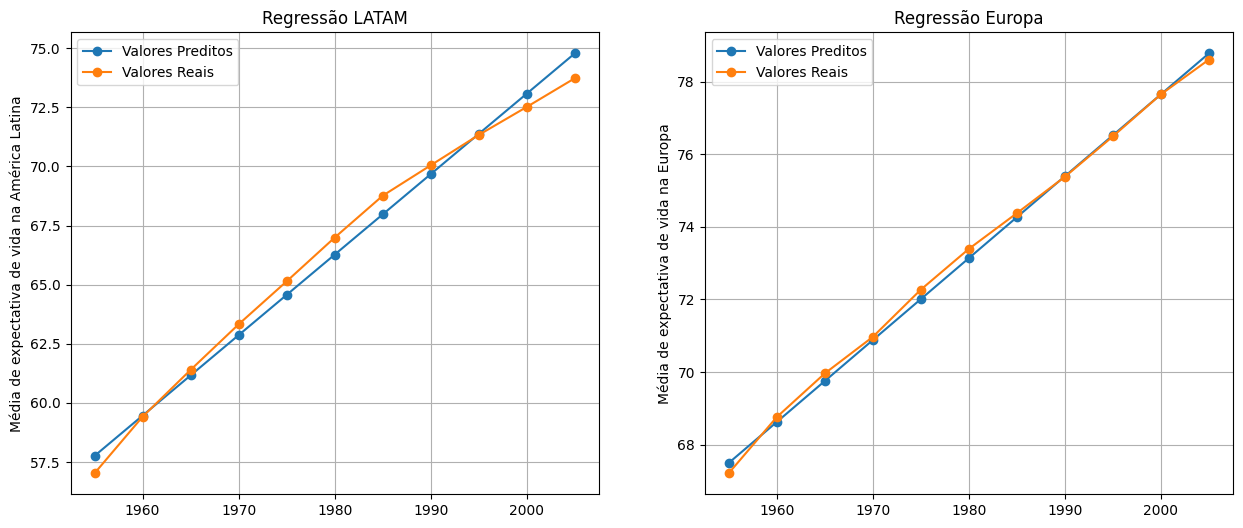

In [20]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(X, predito, marker='o', linestyle='-', label='Valores Preditos'),
plt.plot(X, y, marker='o', linestyle='-', label='Valores Reais'),
plt.ylabel('Média de expectativa de vida na América Latina'),
plt.title('Regressão LATAM'),
plt.legend(),
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(X_eu, predito_eu, marker='o', linestyle='-', label='Valores Preditos'),
plt.plot(X_eu, y_eu, marker='o', linestyle='-', label='Valores Reais'),
plt.ylabel('Média de expectativa de vida na Europa'),
plt.title('Regressão Europa'),
plt.legend(),
plt.grid(True)

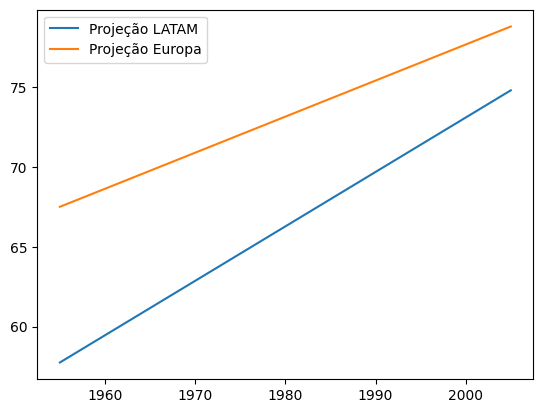

In [21]:
plt.plot(X, predito, label = 'Projeção LATAM')
plt.plot(X, predito_eu, label = 'Projeção Europa')
plt.legend()

### Cálculo de quando a expectativa de vida em LATAM supera a da EUROPA

In [22]:
#Qual será o ano em que as expectativas de vida se igualam?
ano_encontro = (modelo_latam.intercept_ - modelo_eu.intercept_)/(modelo_eu.coef_ - modelo_latam.coef_)
ano_encontro1 = int(ano_encontro[0]//1)
print('O ano em que as expectativas de vida se igualam é:', ano_encontro1)

O ano em que as expectativas de vida se igualam é: 2039


In [24]:
#Qual será o valor da expectativa de vida nesse momento?
valor_2039 = modelo_latam.coef_*ano_encontro + modelo_latam.intercept_
print('A expectativa de vida em 2039 (tanto em LATAM quanto na EUROPA) será:', int(valor_2039[0]//1))

A expectativa de vida em 2039 (tanto em LATAM quanto na EUROPA) será: 86


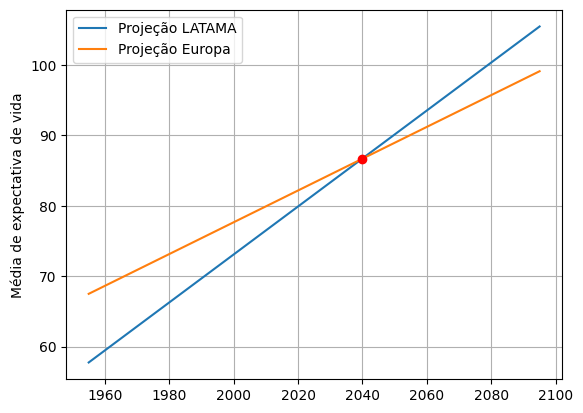

In [25]:
x1 = range(1955,2105, 10)

predito_latam = modelo_latam.coef_*x1 + modelo_latam.intercept_
predito_eu1 = modelo_eu.coef_*x1 + modelo_eu.intercept_

plt.plot(x1, predito_latam, linestyle='-', label='Projeção LATAMA'),
plt.plot(x1, predito_eu1, linestyle='-', label='Projeção Europa'),
plt.scatter(ano_encontro, valor_2039, color = 'red',  zorder=5)
plt.ylabel('Média de expectativa de vida'),
plt.legend(),
plt.grid(True)